In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()

Saving Test_dataset.xlsx to Test_dataset.xlsx


In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#Data Preprocessing

In [74]:
xls = pd.ExcelFile('Train_dataset.xlsx')
data = pd.read_excel(xls,'Train_dataset') 
data_ts = pd.read_excel(xls,'Diuresis_TS')
xls_1 = pd.ExcelFile('Test_dataset.xlsx')
test_data = pd.read_excel(xls_1,'Test_dataset') 
#test_data_ts = pd.read_excel(xls_1,'Diuresis_TS')
test_id = test_data['people_ID']
Y = data['Infect_Prob']
data = data.drop(['Infect_Prob','Designation','Occupation'],axis = 1)
data.head()

,people_ID,Region,Gender,Name,Married,Children,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,1,Bhubaneshwar,Female,mansi,YES,1.0,Public,2,0,Hypertension,68,8,<400,Normal,441.0,154.0,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0
1,2,Bhubaneshwar,Female,riya masi,YES,2.0,Walk,2,0,Diabetes,64,15,<100,Stage-02,NaN,121.0,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0
2,3,Bhubaneshwar,Female,sunita,NO,1.0,Public,2,0,None,19,13,<300,Elevated,416.0,124.0,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0
3,4,Bhubaneshwar,Female,anjali @ babli,YES,1.0,Car,2,0,Coronary Heart Disease,33,9,<200,Stage-01,410.0,98.0,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0
4,5,Bhubaneshwar,Female,champa karketta,NO,2.0,Car,2,0,Diabetes,23,7,<400,Normal,390.0,21.0,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0


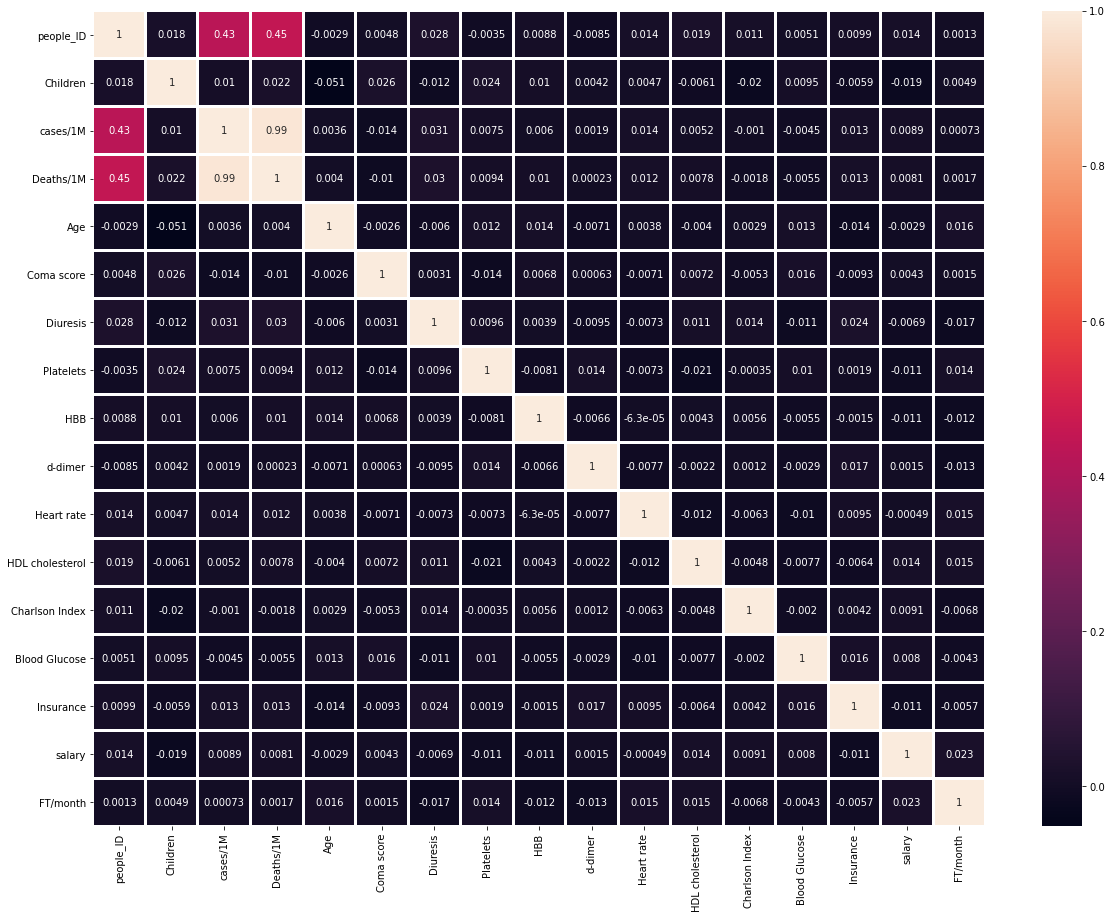

In [75]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
sns.heatmap(data.corr(),ax=ax,annot=True,linewidths=2)

In [76]:
data.head()

,people_ID,Region,Gender,Name,Married,Children,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,1,Bhubaneshwar,Female,mansi,YES,1.0,Public,2,0,Hypertension,68,8,<400,Normal,441.0,154.0,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0
1,2,Bhubaneshwar,Female,riya masi,YES,2.0,Walk,2,0,Diabetes,64,15,<100,Stage-02,NaN,121.0,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0
2,3,Bhubaneshwar,Female,sunita,NO,1.0,Public,2,0,None,19,13,<300,Elevated,416.0,124.0,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0
3,4,Bhubaneshwar,Female,anjali @ babli,YES,1.0,Car,2,0,Coronary Heart Disease,33,9,<200,Stage-01,410.0,98.0,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0
4,5,Bhubaneshwar,Female,champa karketta,NO,2.0,Car,2,0,Diabetes,23,7,<400,Normal,390.0,21.0,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0


In [0]:
data.shape
data['Marital_Status'] = data['Married'].map( {'YES':1, 'NO':0}) 
data['Sex_Male'] = data['Gender'].map( {'Male':1, 'Female':0})
data['MOT'] = data['Mode_transport'].map( {'Public':3, 'Walk':2, 'Car':1}) 
data['cardiological pressure encoded'] = data['cardiological pressure'].map( {'Normal':1, 'Stage-01	': 2 , 'Stage-02	':4,'Elevated': 16 })

In [78]:
for i in range(len(data['Pulmonary score'])):
  data['Pulmonary score'][i] = int(data['Pulmonary score'][i][1:])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
data = data.fillna(0)
Y = Y.fillna(0)

In [80]:
data = data.drop(['Married','Gender','cardiological pressure','Region','Name','Mode_transport','comorbidity'],axis = 1)
data.head()

,people_ID,Children,cases/1M,Deaths/1M,Age,Coma score,Pulmonary score,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Marital_Status,Sex_Male,MOT,cardiological pressure encoded
0,1,1.0,2,0,68,8,400,441.0,154.0,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,1,0,3.0,1.0
1,2,2.0,2,0,64,15,100,0.0,121.0,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,1,0,2.0,0.0
2,3,1.0,2,0,19,13,300,416.0,124.0,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,0,0,3.0,16.0
3,4,1.0,2,0,33,9,200,410.0,98.0,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,1,0,1.0,0.0
4,5,2.0,2,0,23,7,400,390.0,21.0,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,0,0,1.0,1.0


In [81]:
scaler = MinMaxScaler()
for col in data.columns: 
    data[col] = pd.DataFrame(scaler.fit_transform(data[col].values.reshape(-1,1)))
data.head()

,people_ID,Children,cases/1M,Deaths/1M,Age,Coma score,Pulmonary score,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Marital_Status,Sex_Male,MOT,cardiological pressure encoded
0,0.000000,0.5,0.142857,0.0,1.000000,0.416667,1.000000,0.980000,0.96250,0.442857,0.665714,0.82,0.828571,0.675,1.00,0.72,0.50,1.0,1.0,0.0,1.000000,0.0625
1,0.000044,1.0,0.142857,0.0,0.923077,1.000000,0.000000,0.000000,0.75625,0.266667,0.937143,0.89,0.971429,0.125,0.75,0.32,0.05,0.5,1.0,0.0,0.666667,0.0000
2,0.000088,0.5,0.142857,0.0,0.057692,0.833333,0.666667,0.924444,0.77500,0.652381,0.608571,0.77,0.614286,1.000,0.75,0.68,0.30,0.5,0.0,0.0,1.000000,1.0000
3,0.000132,0.5,0.142857,0.0,0.326923,0.500000,0.333333,0.911111,0.61250,0.795238,0.785714,0.64,0.857143,0.675,1.00,0.14,1.00,0.5,1.0,0.0,0.333333,0.0000
4,0.000176,1.0,0.142857,0.0,0.134615,0.333333,1.000000,0.866667,0.13125,0.728571,0.945714,0.71,0.914286,0.800,1.00,0.64,0.40,0.5,0.0,0.0,0.333333,0.0625


# Model


In [0]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score)
from sklearn.metrics import mean_absolute_error
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import TheilSenRegressor
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestCentroid
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.33, random_state=42)

In [84]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7178, 22), (3536, 22), (7178,), (3536,))

In [85]:
a = np.arange(1,100,1)
b = np.arange(1,10,1)
c = np.linspace(0,1,10)
print(a,b,c)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99] [1 2 3 4 5 6 7 8 9] [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


In [0]:
def ModelFit():
  #for n_estimators_val in a:
  #for max_depth_val in b:
  for alpha_val in c:
    model_1 = LinearRegression().fit(X_train, y_train)
    y_test_pred = model_1.predict(X_test)
    print('Mean squared error of Lin Reg: %.2f'% mean_squared_error(y_test,y_test_pred))
    
    model_2 = linear_model.Ridge(alpha=alpha_val).fit(X_train, y_train)
    y_test_pred = model_2.predict(X_test)
    print('Mean squared error of Ridge Reg: %.2f'% mean_squared_error(y_test,y_test_pred),'@Alpha = %.2f' % alpha_val )

    model_3 = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13)).fit(X_train, y_train)
    y_test_pred = model_3.predict(X_test)
    print('Mean squared error of RidgeCV Reg: %.2f'% mean_squared_error(y_test,y_test_pred))

    model_4 = linear_model.Lasso(alpha=alpha_val).fit(X_train, y_train)
    y_test_pred = model_4.predict(X_test)
    print('Mean squared error of Lasso Reg: %.2f'% mean_squared_error(y_test,y_test_pred),'@Alpha = %.2f' % alpha_val )   

    model_6 = linear_model.BayesianRidge().fit(X_train, y_train)
    y_test_pred = model_6.predict(X_test)
    print('Mean squared error of BayesianRidge Reg: %.2f'% mean_squared_error(y_test,y_test_pred))

    #kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
    #model_7 =  GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9).fit(X_train, y_train)
    #y_test_pred = model_7.predict(X_test)
    #print('Mean squared error of GaussianProcessRegressor : %.2f'% mean_squared_error(y_test,y_test_pred)) 

    model_8 = TheilSenRegressor(random_state=0).fit(X_train, y_train)
    y_test_pred = model_8.predict(X_test)
    print('Mean squared error of TheilSenRegressor : %.2f'% mean_squared_error(y_test,y_test_pred))
    
    model_9 = svm.SVR().fit(X_train, y_train)
    y_test_pred = model_9.predict(X_test)
    print('Mean squared error of SVM : %.2f'% mean_squared_error(y_test,y_test_pred))
    
    model_10 = RandomForestRegressor(n_estimators = 35 ,max_depth=5, random_state=0).fit(X_train, y_train)
    y_test_pred = model_10.predict(X_test)
    print('Mean squared error of Random Forest : %.2f'% mean_squared_error(y_test,y_test_pred))#,'@maxDepth = %.2f' % int(max_depth_val ),'@n_estimators = %f' %n_estimators_val)

  #  model_11 = svm.SVR().fit(X_train, y_train)
  #  y_test_pred = model_11.predict(X_test)
  #  print('Mean squared error of SVM : %.2f'% mean_squared_error(y_test,y_test_pred))

In [0]:
#ModelFit()

Minimum Mean squared error of Randon Forest : 74.33 @maxDepth = 5.00 @n_estimators = 35.000000


In [88]:
test_data = test_data.drop(['Designation','Occupation'],axis = 1)
test_data['Marital_Status'] = test_data['Married'].map( {'YES':1, 'NO':0}) 
test_data['Sex_Male'] = test_data['Gender'].map( {'Male':1, 'Female':0})
test_data['MOT'] = test_data['Mode_transport'].map( {'Public':3, 'Walk':2, 'Car':1}) 
test_data['cardiological pressure encoded'] = test_data['cardiological pressure'].map( {'Normal':1, 'Stage-01	': 2 , 'Stage-02	':4,'Elevated': 16 })
for i in range(len(test_data['Pulmonary score'])):
  test_data['Pulmonary score'][i] = int(test_data['Pulmonary score'][i][1:])
test_data = test_data.fillna(0)
test_data = test_data.drop(['Married','Gender','cardiological pressure','Region','Name','Mode_transport','comorbidity'],axis = 1)
scaler = MinMaxScaler()
for col in test_data.columns: 
    test_data[col] = pd.DataFrame(scaler.fit_transform(test_data[col].values.reshape(-1,1)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [0]:
#Predicting the probility of infection using Random Forest Regression on 20th March
model_rf = RandomForestRegressor(n_estimators = 35 ,max_depth=5, random_state=0).fit(X_train, y_train)
y_test_pred = model_rf.predict(test_data)
output1 = pd.DataFrame({'people_ID':test_id,'Infect_Prob':y_test_pred})
output1.to_csv('Prob_20th_March.csv',index=False)

#Part2

In [0]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [91]:
df = data_ts.transpose()
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,10674,10675,10676,10677,10678,10679,10680,10681,10682,10683,10684,10685,10686,10687,10688,10689,10690,10691,10692,10693,10694,10695,10696,10697,10698,10699,10700,10701,10702,10703,10704,10705,10706,10707,10708,10709,10710,10711,10712,10713
people_ID,1.000,2.000,3.000,4.00,5.0,6.000,7.000,8.000,9.00,10.000,11.000,12.000,13.000,14.00,15.000,16.000,17.000,18.000,19.000,20.00,21.000,22.00,23.00,24.000,25.000,26.000,27.000,28.00,29.00,30.00,31.00,32.000,33.00,34.000,35.000,36.000,37.0,38.00,39.000,40.000,...,22656.000,22657.000,22658.000,22659.000,22660.000,22661.00,22662.000,22663.000,22664.00,22665.000,22666.000,22667.000,22668.000,22669.000,22670.0,22671.000,22672.000,22673.000,22674.000,22675.000,22676.000,22677.000,22678.00,22679.000,22680.000,22681.000,22682.000,22683.000,22684.000,22685.000,22686.000,22687.000,22688.000,22689.000,22690.000,22691.000,22692.000,22693.000,22694.000,22695.000
2020-03-20 00:00:00,441.000,151.000,416.000,410.00,390.0,389.000,322.000,194.000,310.00,242.000,373.000,192.000,403.000,120.00,382.000,239.000,199.000,182.000,181.000,220.00,246.000,220.00,415.00,203.000,148.000,381.000,251.000,185.00,365.00,405.00,240.00,236.000,315.00,253.000,289.000,281.000,200.0,365.00,189.000,177.000,...,436.000,301.000,149.000,426.000,268.000,165.00,176.000,178.000,250.00,189.000,411.000,124.000,302.000,426.000,395.0,388.000,149.000,418.000,234.000,159.000,431.000,248.000,145.00,218.000,372.000,347.000,379.000,256.000,417.000,389.000,339.000,241.000,183.000,297.000,397.000,134.000,387.000,177.000,352.000,181.000
2020-03-21 00:00:00,544.200,197.200,515.200,506.00,483.0,480.800,401.400,246.800,385.00,303.400,463.600,245.400,497.600,157.00,474.400,301.800,253.800,232.400,233.200,279.00,308.200,278.00,514.00,258.600,190.600,473.200,315.200,236.00,454.00,501.00,304.00,297.200,393.00,317.600,360.800,351.200,253.0,453.00,239.800,225.400,...,536.200,376.200,194.800,526.200,334.600,214.00,224.200,226.600,314.00,240.800,508.200,163.800,376.400,526.200,487.0,481.600,192.800,515.600,295.800,203.800,532.200,312.600,187.00,274.600,461.400,430.400,467.800,320.200,515.400,479.800,420.800,305.200,232.600,370.400,489.400,173.800,479.400,228.400,438.400,230.200
2020-03-22 00:00:00,669.640,253.240,632.440,621.40,595.0,591.160,497.080,310.360,477.40,379.480,570.520,309.880,612.520,203.80,583.480,377.560,318.760,295.480,295.240,351.40,385.240,350.20,632.20,324.520,242.920,584.440,392.440,299.80,560.20,616.60,380.20,372.040,485.80,397.720,448.360,436.840,319.0,557.80,303.160,285.880,...,658.840,468.040,250.360,648.040,418.120,272.20,284.440,286.120,393.40,304.360,626.440,213.160,467.080,646.840,601.0,594.520,245.560,634.120,369.160,261.160,652.840,391.720,238.60,344.920,570.280,530.680,576.760,399.640,632.680,589.960,519.160,382.840,293.320,459.880,603.880,225.160,591.880,288.280,542.680,290.440
2020-03-23 00:00:00,821.368,321.688,776.728,761.88,730.2,723.992,611.096,388.632,589.08,469.976,702.424,389.656,751.224,262.36,717.976,470.872,398.712,372.376,372.088,439.48,480.088,436.44,776.44,404.024,309.304,719.128,485.528,377.56,688.44,754.52,474.04,464.248,600.76,491.864,555.832,542.008,400.6,685.56,378.392,360.856,...,805.208,577.848,318.232,793.848,519.544,342.84,355.928,361.144,489.88,381.432,769.528,271.992,576.696,792.408,735.8,728.024,312.472,775.544,460.792,329.592,798.008,487.864,304.12,428.504,698.936,651.416,708.312,497.368,777.016,722.552,639.192,477.208,368.184,568.056,742.456,287.992,724.856,362.136,665.816,366.328


In [0]:
df.columns = df.columns.values.tolist()
df = np.array(df)
tmp = []

In [93]:
model = VAR(endog=df)
model_fit = model.fit()
y_on_27 = model_fit.forecast(model_fit.y, steps=1)
tmp.append(y_on_27)

/usr/local/lib/python3.6/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [0]:
l = [item for sublist in tmp for item in sublist]
l = [item for sublist in l for item in sublist]

In [95]:
k = pd.DataFrame(l, columns=['Diuresis'])
k

,Diuresis
0,1783.103700
1,746.070169
2,1692.725795
3,1660.690670
4,1595.923864
...,...
10709,678.075265
10710,1579.848966
10711,829.923400
10712,1462.734284


In [0]:
data['Diuresis'] = pd.DataFrame(scaler.fit_transform(k['Diuresis'].values.reshape(-1,1)))

In [0]:
test_data['Diuresis'] = pd.DataFrame(scaler.fit_transform(k['Diuresis'].values.reshape(-1,1)))

In [98]:
data.head()

,people_ID,Children,cases/1M,Deaths/1M,Age,Coma score,Pulmonary score,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Marital_Status,Sex_Male,MOT,cardiological pressure encoded
0,0.000000,0.5,0.142857,0.0,1.000000,0.416667,1.000000,0.969603,0.96250,0.442857,0.665714,0.82,0.828571,0.675,1.00,0.72,0.50,1.0,1.0,0.0,1.000000,0.0625
1,0.000044,1.0,0.142857,0.0,0.923077,1.000000,0.000000,0.134518,0.75625,0.266667,0.937143,0.89,0.971429,0.125,0.75,0.32,0.05,0.5,1.0,0.0,0.666667,0.0000
2,0.000088,0.5,0.142857,0.0,0.057692,0.833333,0.666667,0.896825,0.77500,0.652381,0.608571,0.77,0.614286,1.000,0.75,0.68,0.30,0.5,0.0,0.0,1.000000,1.0000
3,0.000132,0.5,0.142857,0.0,0.326923,0.500000,0.333333,0.871029,0.61250,0.795238,0.785714,0.64,0.857143,0.675,1.00,0.14,1.00,0.5,1.0,0.0,0.333333,0.0000
4,0.000176,1.0,0.142857,0.0,0.134615,0.333333,1.000000,0.818874,0.13125,0.728571,0.945714,0.71,0.914286,0.800,1.00,0.64,0.40,0.5,0.0,0.0,0.333333,0.0625


In [0]:
X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.33, random_state=42)

In [68]:
ModelFit()

Mean squared error of Lin Reg: 79.85
Mean squared error of Ridge Reg: 79.85 @Alpha = 0.00
Mean squared error of RidgeCV Reg: 79.90


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 297215.9990287024, tolerance: 83.28001052585117
  positive)


Mean squared error of Lasso Reg: 79.85 @Alpha = 0.00
Mean squared error of BayesianRidge Reg: 79.90
Mean squared error of TheilSenRegressor : 80.04
Mean squared error of SVM : 78.74
Mean squared error of Random Forest : 74.34
Mean squared error of Lin Reg: 79.85
Mean squared error of Ridge Reg: 79.85 @Alpha = 0.11
Mean squared error of RidgeCV Reg: 79.90
Mean squared error of Lasso Reg: 80.65 @Alpha = 0.11
Mean squared error of BayesianRidge Reg: 79.90


KeyboardInterrupt: ignored

Minimum Mean squared error of Random Forest : 74.34

In [0]:
test_data = test_data.fillna(0)

In [0]:
#Predicting the probility of infection using Random Forest Regression on 27th March
model_rf = RandomForestRegressor(n_estimators = 35 ,max_depth=5, random_state=0).fit(X_train, y_train)
y_test_pred = model_rf.predict(test_data)
output = pd.DataFrame({'people_ID':test_id,'Infect_Prob':y_test_pred})
output.to_csv('Prob_27_March.csv',index=False)